In [1817]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

# 1. Non-centered Data and Principal Component Analysis (PCA)

## 1.1

In [1818]:
matrixA = np.random.randn(3, 2)
vectorC = np.squeeze(np.random.normal(loc=0.0, scale=np.sqrt(3), size=(1,3)))
print(matrixA)
print(vectorC)

[[-2.56122629  0.21802212]
 [-0.03665747  0.32928646]
 [ 0.222707   -0.97623198]]
[ 3.31212222 -2.09177825  0.68578665]


## 1.2

In [1819]:
dataset_syn = np.zeros((250, 3))
for row in range(dataset_syn.shape[0]):
  vectorB = np.random.randn(2, 1)
  vectorX = np.squeeze(np.transpose(np.matmul(matrixA, vectorB))) + vectorC
  dataset_syn[row,:] = vectorX

## 1.3

In [1820]:
print("rank:", np.linalg.matrix_rank(dataset_syn))

rank: 3


## 1.4

$c = Ab_i$

$c = -1*Ab_i$

## 1.5

### (a)

In [1821]:
left_syn, svals_syn, right_syn = np.linalg.svd(dataset_syn)
component1index_syn = np.argmax(svals_syn)
svals_syn[component1index_syn] = -999999999999999999
component2index_syn = np.argmax(svals_syn)
component1_syn = right_syn.transpose()[:, component1index_syn]
component2_syn = right_syn.transpose()[:, component2index_syn]
umat_syn = np.transpose(np.matrix([component1_syn, component2_syn]))
print(umat_syn)

[[-0.90201971 -0.39122332]
 [ 0.41413512 -0.6648603 ]
 [-0.12187101  0.63632154]]


### (b)

In [1822]:
uut_syn = np.matmul(umat_syn, umat_syn.transpose())
xhat_syn = np.zeros((250, 3))
for row in range(xhat_syn.shape[0]):
  xhat_syn[row, :] = np.matmul(uut_syn, dataset_syn[row, :])

### (c)

In [1823]:
error_syn = np.power(np.linalg.norm(dataset_syn - xhat_syn), 2)
print("error:", error_syn)

error: 87.82402658456658


## 1.6

In [1824]:
meanarr = np.zeros((3, 1))
meanarr[:, 0] = np.mean(dataset_syn, axis = 0).transpose()
M = np.zeros((3, 250))
M[:, :] = meanarr

left_centered, svals_centered, right_centered = np.linalg.svd(dataset_syn - np.transpose(M))
component1index_centered = np.argmax(svals_centered)
svals_centered[component1index_centered] = -999999999999999999
component2index_centered = np.argmax(svals_centered)
component1_centered = right_centered.transpose()[:, component1index_centered]
component2_centered = right_centered.transpose()[:, component2index_centered]
umat_centered = np.transpose(np.matrix([component1_centered, component2_centered]))

xhat_centered = np.transpose(np.matmul(umat_centered, np.matmul(umat_centered.transpose(), dataset_syn.transpose() - M)) + M)

error_centered = np.square(np.linalg.norm(dataset_syn - xhat_centered))
print('PCA error with emperical mean vector implementation: ', error_centered)

PCA error with emperical mean vector implementation:  3.5132043673534197e-28


# 2. Preprocessing (Centering) and PCA Using `scikit learn`

## 2.1

In [1825]:
# create an instance of the StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
# use the fit_transform API to simultaneously compute mean and center data
skl_centered_X = mean_datascaler.fit_transform(dataset_syn)

## 2.2

In [1826]:
print("scikit mean vector:", mean_datascaler.mean_)
print("1.6 mean vector:", meanarr.transpose())

scikit mean vector: [ 3.2800963  -2.09577684  0.69896172]
1.6 mean vector: [[ 3.2800963  -2.09577684  0.69896172]]


## 2.3

In [1952]:
error3 = np.power(np.linalg.norm(dataset_syn - np.transpose(M) - skl_centered_X), 2)
print(error3)

0.0


## 2.4

In [1953]:
# create an instance of the PCA() object
data_pca = skldecomp.PCA(n_components=2, svd_solver='full')
# use fit_transform API to simultaneously compute PCA features & directions
skl_features = data_pca.fit_transform(skl_centered_X)

## 2.5

In [1954]:
print(data_pca.components_)
print(umat_centered.transpose())

[[ 0.990923    0.02951086 -0.1311515 ]
 [ 0.13364697 -0.32145666  0.93744552]]
[[-0.990923   -0.02951086  0.1311515 ]
 [ 0.13364697 -0.32145666  0.93744552]]


## 2.6

In [1955]:
projection = data_pca.inverse_transform(skl_features) + mean_datascaler.mean_

## 2.7

In [1956]:
error4 = np.power(np.linalg.norm(xhat_centered - projection), 2)
print("error:", error4)

error: 1.4105202763901013e-28


# 3. PCA as a Denoising Tool

## 3.1

In [1941]:
a = np.random.randn(3)
print(a)

[-0.58364444  0.95305183  0.04328512]


## 3.2

In [1942]:
dataset = np.zeros((100, 3))
for row in range(dataset.shape[0]):
  b = np.random.normal(loc=0.0, scale=np.sqrt(4), size=(1))
  dataset[row, :] = b*a

## 3.3

In [1943]:
noisy = dataset.copy()
for row in range(noisy.shape[0]):
  noisy[row, :] = noisy[row, :] + np.random.normal(loc=0.0, scale=np.sqrt(0.05), size=(1,3))

## 3.4

Standard Dataset (1)
Noisy Dataset (2)


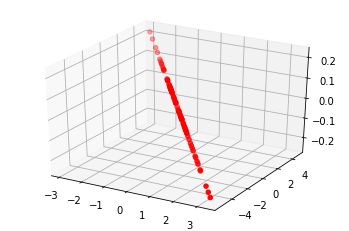

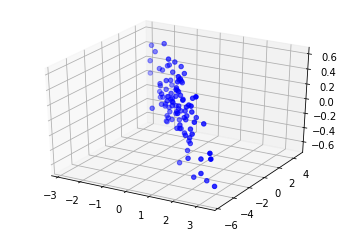

In [1944]:
print("Standard Dataset (1)")
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c="red")

print("Noisy Dataset (2)")
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.scatter(noisy[:, 0], noisy[:, 1], noisy[:, 2], c="blue")

## 3.5

In [1945]:
u, s, vh = np.linalg.svd(dataset)
scopy = s
max1index = np.argmax(scopy)
u1 = np.transpose(vh)[:, max1index]
u = np.transpose(np.matrix([u1]))

uut = np.matmul(u, np.transpose(u))
xhat3 = np.zeros((100, 3))
for row in range(dataset.shape[0]):
  xhat3[row, :] = np.matmul(uut, dataset[row, :])

## 3.6

Standard Dataset (3)
Denoised Dataset (4)


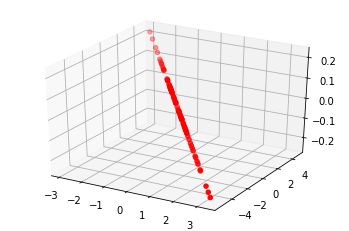

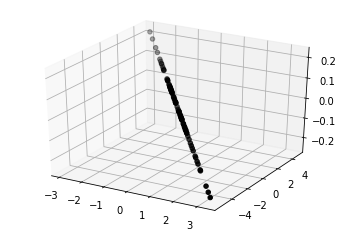

In [1948]:
print("Standard Dataset (3)")
fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')
ax3.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c="red")

print("Denoised Dataset (4)")
fig4 = plt.figure()
ax4 = fig4.gca(projection='3d')
ax4.scatter(xhat3[:, 0], xhat3[:, 1], xhat3[:, 2], c="black")

## 3.7

In [1947]:
error5 = np.power(np.linalg.norm(dataset - noisy), 2)
print("error:", error5)
error6 = np.power(np.linalg.norm(dataset - xhat3), 2)
print("error:", error6)

error: 15.231572309910675
error: 9.252023309017007e-29


## 3.8

For data with high signal to noise ratio, PCA is very effective at denoising data as the strength of the principal component due to noise is much much less than the strength of the principal component due to the data before noise is added. In fact the higher the signal to noise ratio, the less error we will have in denoising our data